# 04. Redes neuronales densamente conectadas

**Python Deep Learning**
Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 https://www.marcombo.com/python-deep-learning-9788426728289/

## Inicializaciones

In [1]:
try:
  # %tensorflow_version solo existe en Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


## 4.1 Caso de estudio: reconocimiento de dígitos

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

1


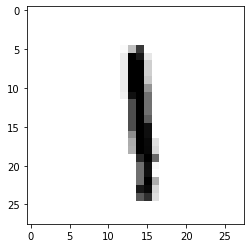

In [3]:
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

In [4]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[8]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

## 4.4 Función de activación softmax

Modelo con una capa softmax para visualizar los modelos aprendidos

In [5]:
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='softmax', name="FC1", input_shape=(784,))
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1 (Dense)                  (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4702 - accuracy: 0.8777
10000/10000 - 1s - loss: 0.3054 - accuracy: 0.9148


[0.3053944380879402, 0.9148]

Figura 4.14 Modelo aprendido correspondiente al número 0

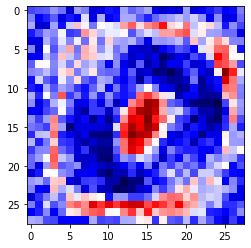

In [6]:
w = model.get_weights()
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,0].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))

Figura 4.5 Matriz de parámetros correspondiente al modelo de la categoría cero

In [7]:
np.set_printoptions(precision=0, suppress = True, linewidth=220)
print(np.matrix (255*(w[:,0].reshape([28,28]))))

[[  -3.   -6.   -7.  -17.  -10.   20.  -18.  -12.   17.   14.    6.    8.  -19.   -8.  -13.  -19.   14.   21.   14.   20.  -18.   17.   11.    5.   -1.    9.    8.  -13.]
 [ -14.   10.    4.   -7.   16.    5.   10.  -30.   14.  -21.   11.    6.  -20.  -20.   -7.    4.   -8.  -16.  -19.  -24.  -18.  -27.  -17.   10.  -15.   17.   14.   -9.]
 [ -20.   20.   19.  -19.    7.  -26.  -46.  -33.  -11.  -35.  -33.  -28.  -51.  -63.  -41.  -55.  -61.  -77.  -42.  -38.  -59.  -25.  -37.  -42.  -24.    6.  -15.   -3.]
 [   5.   -6.  -18.  -14.  -33.   -1.   -4.  -53.  -42.  -24.  -32.  -31.  -36.   -5.  -20.  -30.  -23.  -52.  -51.  -60.  -65.  -29.  -38.  -19.  -18.   -9.  -10.   15.]
 [  16.   17.  -21.  -10.  -31.  -14.  -32.   -9.  -39.  -10.  -43.  -20.  -18.  -22.   -9.   15.  -18.  -16.  -19.  -24.   -6.  -46.  -19.  -38.  -53.  -41.  -14.  -13.]
 [ -14.   18.  -35.   -5.  -23.  -50.  -11.  -49.  -42.  -17.  -30.  -10.  -18.   17.   23.   23.   36.   13.    5.   -6.   -1.   10.  -30.  -41.

Figura 4.16 Modelo aprendido correspondiente al número 3

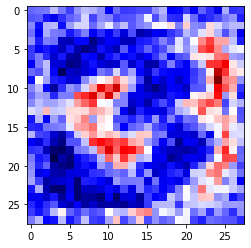

In [8]:
w = model.get_weights()
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,3].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))